<a href="https://colab.research.google.com/github/jatinray99/stock-market-prediction/blob/main/Stock_price_prediction(new).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import yfinance as yf

In [2]:
from keras.layers import Conv1D, MaxPooling1D, Flatten
from sklearn.ensemble import RandomForestRegressor

In [3]:
start ='2023-01-01'
end='2023-12-01'
stock='GOOG'
data=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,89.830002,91.550003,89.019997,89.699997,89.699997,20738500
2023-01-04,91.010002,91.239998,87.800003,88.709999,88.709999,27046500
2023-01-05,88.070000,88.209999,86.559998,86.769997,86.769997,23136100
2023-01-06,87.360001,88.470001,85.570000,88.160004,88.160004,26612600
2023-01-09,89.195000,90.830002,88.580002,88.800003,88.800003,22996700
...,...,...,...,...,...,...
2023-11-24,139.539993,139.677002,137.470001,138.220001,138.220001,8828600
2023-11-27,137.570007,139.630005,137.539993,138.050003,138.050003,17886400
2023-11-28,137.630005,138.660004,137.039993,138.619995,138.619995,17046900


In [5]:
#we are just changinf the indices to normal numerals rather than showcasing date
data.reset_index(inplace=True)

In [6]:
#lets see the movin average over 100 days
ma_100_days=data.Close.rolling(100).mean()

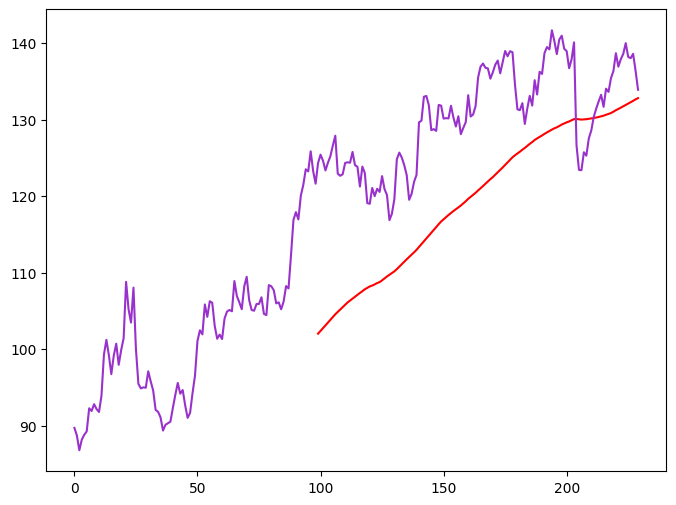

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'darkorchid')
plt.show()

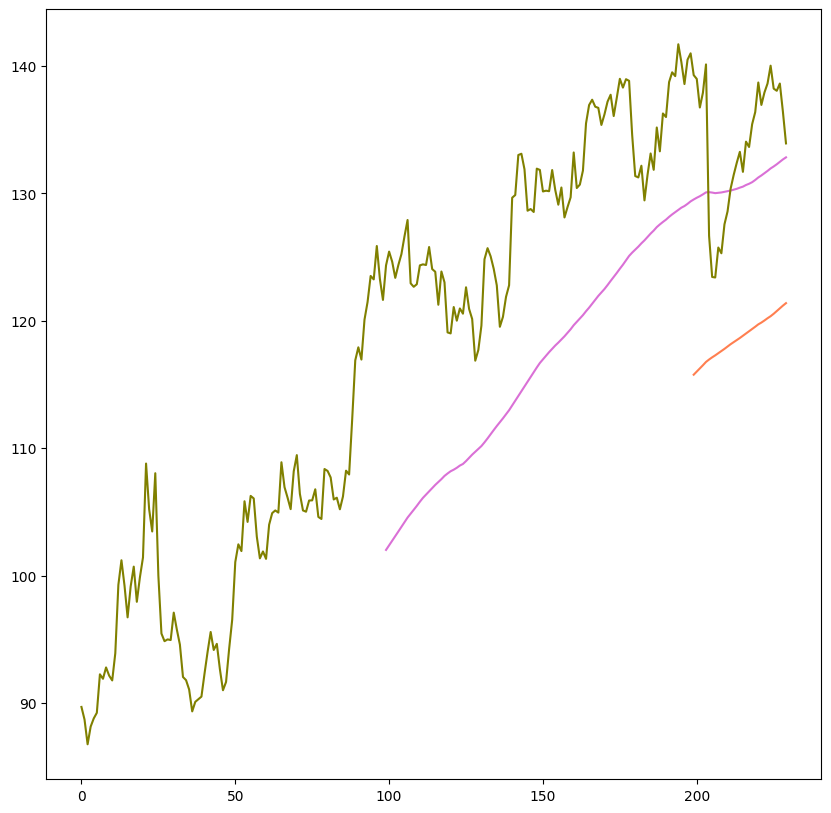

In [8]:
ma_200_days=data.Close.rolling(200).mean()
plt.figure(figsize=(10,10))
plt.plot(ma_200_days,'coral')
plt.plot(ma_100_days,'orchid')
plt.plot(data.Close,'olive')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [11]:
data_train.shape,data_test.shape

((184, 1), (46, 1))

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [13]:
data_train_scale=scaler.fit_transform(data_train)

In [14]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [15]:
x,y=np.array(x,),np.array(y)

In [16]:
#model
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

TCN Layer

In [41]:
x = x.reshape((x.shape[0], x.shape[1], 1))
print("Input shape after reshaping:", x.shape)
model = Sequential()

Input shape after reshaping: (84, 100, 1)


In [37]:
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x.shape[1], x.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

LSTM Layers

In [42]:
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu', return_sequences=True))
model.add(Dropout(0.5))

In [43]:
#outputlayer
model.add(Dense(units=1))

In [44]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [45]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
3/3 [==============================] - 8s 249ms/step - loss: 0.6215
Epoch 2/50
3/3 [==============================] - 1s 259ms/step - loss: 0.5506
Epoch 3/50
3/3 [==============================] - 1s 262ms/step - loss: 0.4080
Epoch 4/50
3/3 [==============================] - 1s 269ms/step - loss: 0.2578
Epoch 5/50
3/3 [==============================] - 1s 254ms/step - loss: 0.1470
Epoch 6/50
3/3 [==============================] - 1s 257ms/step - loss: 0.1827
Epoch 7/50
3/3 [==============================] - 1s 266ms/step - loss: 0.2152
Epoch 8/50
3/3 [==============================] - 1s 257ms/step - loss: 0.2075
Epoch 9/50
3/3 [==============================] - 1s 264ms/step - loss: 0.1761
Epoch 10/50
3/3 [==============================] - 1s 450ms/step - loss: 0.1244
Epoch 11/50
3/3 [==============================] - 1s 456ms/step - loss: 0.0792
Epoch 12/50
3/3 [==============================] - 1s 255ms/step - loss: 0.0895
Epoch 13/50
3/3 [==============================] 

In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_15 (LSTM)              (None, 100, 120)         

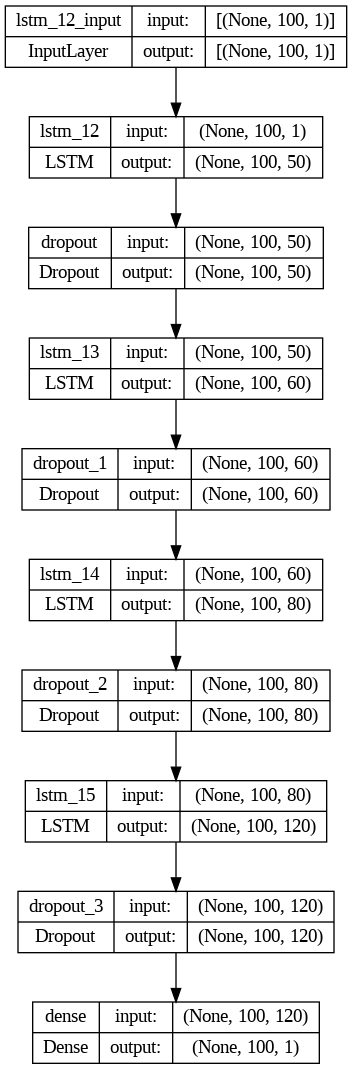

In [49]:
from keras.utils import plot_model
plot_model(model, to_file='model_lstm_tcn.png', show_shapes=True, show_layer_names=True)

In [50]:
past_100_days=data_train.tail(100)
data_test=pd.concat([past_100_days,data_test],ignore_index=True)

In [51]:
data_test_scale=scaler.fit_transform(data_test)

In [52]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])

In [53]:
x,y=np.array(x),np.array(y)

In [54]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x.reshape(x.shape[0], x.shape[1]), y)

RandomForestRegressor(random_state=42)

In [55]:
scaler.scale_
p=scaler.scale_
1/p

array([36.48999786])

In [58]:
lstm_tcn_predictions = lstm_tcn_predictions.reshape(-1)
rf_predictions = rf_predictions.reshape(-1)

# Ensure that both arrays have the same length
min_length = min(len(lstm_tcn_predictions), len(rf_predictions))
lstm_tcn_predictions = lstm_tcn_predictions[:min_length]
rf_predictions = rf_predictions[:min_length]

# Calculate ensemble predictions by averaging
ensemble_predictions = (lstm_tcn_predictions + rf_predictions) / 2

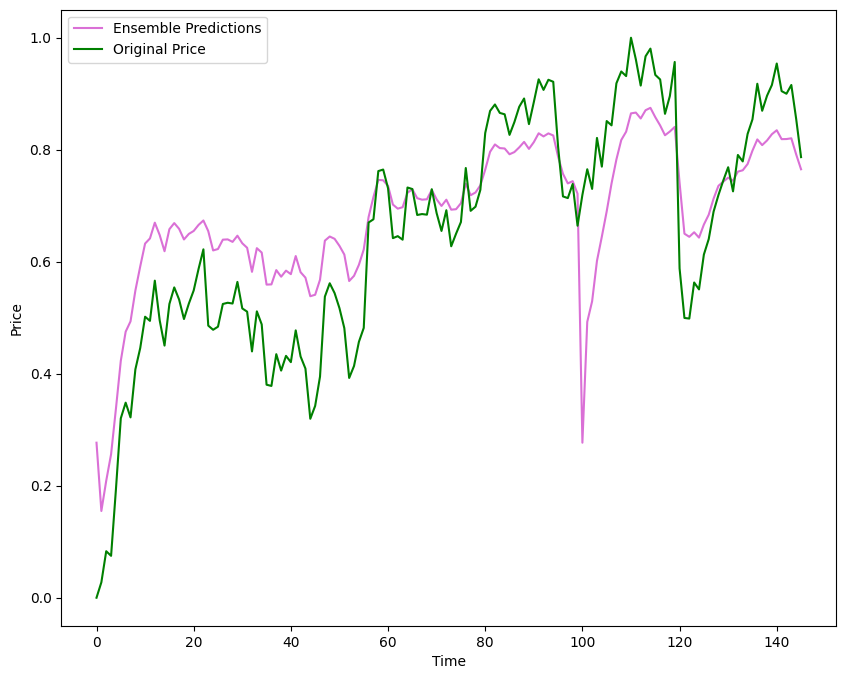

In [59]:
plt.figure(figsize=(10, 8))
plt.plot(ensemble_predictions, 'orchid', label='Ensemble Predictions')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [60]:
model.save('Stock Predictions Model')